Getting your data ready
* Converting data into features and label
* Filling missing data called imputing
* Convrting non numerical data into numeric form also called feature encoding

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
car=pd.read_csv('/content/car-sales-extended.csv')
car.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [3]:
car['Make'].value_counts(), car['Colour'].value_counts(), car['Doors'].value_counts()

(Make
 Toyota    398
 Honda     304
 Nissan    198
 BMW       100
 Name: count, dtype: int64,
 Colour
 White    407
 Blue     321
 Black     99
 Red       94
 Green     79
 Name: count, dtype: int64,
 Doors
 4    856
 5     79
 3     65
 Name: count, dtype: int64)

In [4]:
car.shape, car.dtypes

((1000, 5),
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object)

In [5]:
x=car.drop('Price', axis=1)
y=car['Price']
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


Transforming non numeric data into numerical form

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categories=['Make', 'Colour', 'Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot', one_hot, categories)], remainder='passthrough')
tx=transformer.fit_transform(x)
pd.DataFrame(tx)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


We can also do this with pd.dummies

ML models treats True/False as 0/1 but if we want in numeric we can use dtype=int

But it only converts non numeric to numeric and does not convert numeric into numerical group

In [7]:
dummies=pd.get_dummies(car[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [8]:
x_train, x_test, y_train, y_test=train_test_split(tx,y, test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [10]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [11]:
model.score(x_train, y_train)

0.8909774499045638

In [12]:
model.score(x_test, y_test) * 100

32.679387443441875

In [13]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# categoriees=['','']
# one_hot=OneHotEncoder()
# transformer= ColumnTransformer([('one_hot', one_hot, categories)], remainder='Passthrough')
# transformer.fit_transform(x)

# **Filling Missing Values**

In [14]:
carm=pd.read_csv('/content/car-sales-extended-missing-data.csv')
carm.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [15]:
carm.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


First we are deleting rows of labels with null values because after training on these labels, it will predict the prices

In [16]:
carm.dropna(subset=['Price'], inplace=True)
carm.isna().sum()

,0
Make,47
Colour,46
Odometer (KM),48
Doors,47
Price,0


Converting data into x and y

In [17]:
x=carm.drop("Price", axis=1)
y=carm['Price']
x.isna().sum()

,0
Make,47
Colour,46
Odometer (KM),48
Doors,47


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_impute=SimpleImputer(strategy="constant", fill_value="missing")
od_impute=SimpleImputer(strategy="mean")
do_impute=SimpleImputer(strategy="constant", fill_value=4)

cat1=['Make', 'Colour']
cat2=['Odometer (KM)']
cat3=['Doors']
transformer=ColumnTransformer([("cat_impute", cat_impute, cat1),("od_impute", od_impute, cat2),("do_impute", do_impute, cat3)])
imputed = transformer.fit_transform(x)

In [19]:
fx=pd.DataFrame(imputed, columns=["Make", "Colour","Odometer (KM)", "Doors"])
fx

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
945,Toyota,Black,35820.0,4.0
946,missing,White,155144.0,3.0
947,Nissan,Blue,66604.0,4.0
948,Honda,White,215883.0,4.0


In [20]:
from sklearn.preprocessing import OneHotEncoder
categories=['Make','Colour']
one_hot=OneHotEncoder()
transformer= ColumnTransformer([('one_hot', one_hot, categories)], remainder='passthrough')
transx=transformer.fit_transform(fx)
Final_x=pd.DataFrame(transx)
Final_x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181577.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35820.0,4.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,155144.0,3.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66604.0,4.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,215883.0,4.0


In [21]:
x_train, x_test, y_train, y_test=train_test_split(Final_x, y, train_size=0.8)

In [22]:
reg=RandomForestRegressor()

In [23]:
reg.fit(x_train, y_train)

RandomForestRegressor()

In [24]:
reg.score(x_train, y_train)

0.8749984267084403

In [25]:
reg.score(x_test, y_test)* 100

29.876092937331865

# **Choosing machine learning model for regression**

In [26]:
boston = pd.read_csv("/content/BostonHousing.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [27]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [28]:
x1=boston.drop("medv", axis=1)
y1=boston['medv']

In [29]:
x_train, x_test, y_train, y_test=train_test_split(x1,y1, test_size=0.2)

In [30]:
ridge.fit(x_train, y_train)

Ridge()

In [31]:
ridge.score(x_test, y_test) * 100

59.59640885399207

In [32]:
rf=RandomForestRegressor()

In [33]:
rf.fit(x_train, y_train)

RandomForestRegressor()

Comparing scores of ridge and regression Model

In [34]:
rf.score(x_test, y_test)

0.7052530794687885

In [35]:
ridge.score(x_test, y_test)

0.5959640885399207

# **Choosing ML Model for classification**

In [36]:
hd=pd.read_csv("/content/heart-disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [37]:
from sklearn.svm import LinearSVC
x2=hd.drop("target", axis=1)
y2=hd["target"]

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x2, y2, test_size=0.2)

In [39]:
clf1=LinearSVC()
clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)

0.7377049180327869

# **Comparing LinearSVC with RandomForestClassifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()

In [41]:
clf2.fit(x_train, y_train)
clf2.score(x_test, y_test)

0.7377049180327869

# **Fitting the Model**


*   x--> data, features, features variable
*   y--> target, target variable, label



In [42]:
clf2.fit(x_train, y_train) # ML Model use the data to find patterns
clf2.score(x_test, y_test) # ML Model now apply the algo to the test data

0.7704918032786885

# **Predicting a model**

In [43]:
y_pred=clf2.predict(x_test)
np.mean(y_pred == y_test)

np.float64(0.7704918032786885)

In [44]:
clf2.score(x_test,y_test)

0.7704918032786885

In [45]:
clf2.predict_proba(x_test)

array([[0.35, 0.65],
       [0.22, 0.78],
       [0.66, 0.34],
       [0.64, 0.36],
       [0.44, 0.56],
       [0.6 , 0.4 ],
       [0.22, 0.78],
       [0.34, 0.66],
       [0.1 , 0.9 ],
       [0.99, 0.01],
       [0.29, 0.71],
       [0.53, 0.47],
       [0.22, 0.78],
       [0.01, 0.99],
       [0.58, 0.42],
       [0.5 , 0.5 ],
       [0.88, 0.12],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.53, 0.47],
       [0.3 , 0.7 ],
       [0.23, 0.77],
       [0.48, 0.52],
       [0.89, 0.11],
       [0.05, 0.95],
       [0.27, 0.73],
       [0.1 , 0.9 ],
       [0.66, 0.34],
       [0.26, 0.74],
       [0.99, 0.01],
       [0.67, 0.33],
       [0.14, 0.86],
       [0.62, 0.38],
       [0.16, 0.84],
       [0.54, 0.46],
       [0.02, 0.98],
       [0.5 , 0.5 ],
       [0.15, 0.85],
       [0.41, 0.59],
       [0.81, 0.19],
       [0.56, 0.44],
       [0.12, 0.88],
       [0.1 , 0.9 ],
       [0.98, 0.02],
       [0.53, 0.47],
       [0.93, 0.07],
       [0.94, 0.06],
       [0.81,

In [46]:
from sklearn.ensemble import RandomForestRegressor
x3=boston.drop("medv", axis=1)
y3=boston['medv']

x_train, x_test, y_train, y_test=train_test_split(x3, y3, test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train, y_train)
y_pred1=model.predict(x_test)
y_pred1

array([26.598, 20.088, 11.058, 25.592, 19.197, 22.755, 26.419, 20.518,
       27.416, 11.815, 20.837, 16.693, 22.382, 31.817, 13.352, 31.794,
       16.318, 34.045,  8.333, 18.743, 21.279, 20.482, 43.295, 15.781,
       16.669, 24.144, 14.92 , 18.651, 28.116, 15.431, 44.408, 34.527,
       20.546, 20.769, 23.713, 24.881, 19.746, 20.42 , 32.275, 22.742,
       19.322, 24.913, 36.332, 33.98 , 12.228, 14.474, 20.09 , 21.676,
       22.509, 24.221, 23.067, 21.103, 18.863,  9.284, 32.878, 22.158,
       13.953, 14.334, 14.68 , 21.443, 41.413, 25.692, 20.394, 10.704,
       31.238, 14.003, 14.318, 12.956, 19.543, 21.096,  8.513, 20.78 ,
       23.188, 21.656, 11.181, 23.583, 20.541, 20.825, 15.387, 21.673,
       30.439, 17.241, 21.281, 18.699, 30.448, 24.35 , 24.13 , 46.478,
       20.004, 26.711, 10.897, 33.676, 21.71 , 13.884, 15.584, 21.246,
       16.786, 34.904, 24.422, 34.494, 20.202, 18.653])

In [47]:
np.array(y_test)

array([26.2, 18.9,  8.3, 22.4, 20.5, 23.6, 23.9, 16.1, 23.9, 17.9, 22.2,
       19.9, 19.1, 29.6, 17.8, 33.1, 27.5, 34.9,  8.5, 19.6, 19.2, 20.4,
       35.2, 15.2, 14.1, 23.7, 13.3, 17.6, 27.9, 23.2, 48.3, 37.3, 19.9,
       11.9, 23.8, 23.8, 18.5, 18.3, 33. , 20.3, 16.6, 24.8, 27.9, 37.9,
       13.4, 13.5, 19.6, 21.2, 20.1, 24.3, 24.8, 19.3, 18.7,  5.6, 33.2,
       23.9, 11.7, 14. , 13. , 21.2, 44. , 17.8, 20.3,  9.7, 37. , 14.9,
       16.7, 17.2, 20.4, 20. ,  8.8, 21.2, 26.4, 18.6,  7.5, 25. , 20.8,
       19.9, 19.4, 24.3, 37.2, 19.1, 16.1, 19.7, 35.1, 25. , 23.1, 42.3,
       14.5, 22. , 12.3, 15. , 21.2, 19. , 14.3, 18.5, 17.4, 36.5, 27.5,
       34.7, 19.4, 18.3])

Comparing the Predictions using mean absolute error

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred1)

2.5182352941176487

mean absolute error --> it take both test label and predicted labe and Subtract with each other and the difference we get is added and that is the value we can say ML models predict the value with this much difference For ex: 1.99~2 is mean absolute error value and if y_test data has 22 then our model can predict 20 or 24 around that

# **Evaluating the ML model**

*   Score method
*   Scoring parameter



In [49]:
model.score(x_test, y_test)

0.7870529015616557

In [50]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x3, y3)


array([0.76564729, 0.85150739, 0.72688087, 0.47011786, 0.26111567])

# **Evaluation of classsification model**
*  Accuracy
*  ROC curve
*  Confusion matrix
*  Classification report

In [51]:
from sklearn.ensemble import RandomForestRegressor
x4=hd.drop("target", axis=1)
y4=hd['target']
model=RandomForestClassifier()
cross_val_score(model, x4, y4)

array([0.83606557, 0.86885246, 0.78688525, 0.8       , 0.75      ])

In [52]:
np.mean(cross_val_score(model, x4, y4)) * 100

np.float64(80.50819672131148)

# **Reciever operating characteristics(AUC/ROC)**
ROC is a comparison of model's True positive curve (tpr) versus false positive curve (fpr).
*  True positive when model predict 1 but truth is 1
*  False positive when model predict 1 but truth is 0
* True negative when model predicts 0 but truth is 0
* False negative when model predicts 0 but truth is 1

In [53]:
from sklearn.metrics import roc_curve
x_train, x_test, y_train, y_test=train_test_split(x4, y4, test_size=0.2)
model.fit(x_train, y_train)
y_prob=model.predict_proba(x_test)
y_prob


array([[0.55, 0.45],
       [0.16, 0.84],
       [0.29, 0.71],
       [0.33, 0.67],
       [0.35, 0.65],
       [0.07, 0.93],
       [0.15, 0.85],
       [0.11, 0.89],
       [0.53, 0.47],
       [0.02, 0.98],
       [0.84, 0.16],
       [0.31, 0.69],
       [0.62, 0.38],
       [0.2 , 0.8 ],
       [0.88, 0.12],
       [0.43, 0.57],
       [0.05, 0.95],
       [0.62, 0.38],
       [0.66, 0.34],
       [0.53, 0.47],
       [0.04, 0.96],
       [0.36, 0.64],
       [0.23, 0.77],
       [0.34, 0.66],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.13, 0.87],
       [0.38, 0.62],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.07, 0.93],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.03, 0.97],
       [0.86, 0.14],
       [0.44, 0.56],
       [0.92, 0.08],
       [0.12, 0.88],
       [0.94, 0.06],
       [0.28, 0.72],
       [0.13, 0.87],
       [0.69, 0.31],
       [0.84, 0.16],
       [0.77, 0.23],
       [0.45, 0.55],
       [0.08, 0.92],
       [0.17, 0.83],
       [0.02,

In [54]:
y_probp=y_prob[:, 1]
y_probp

array([0.45, 0.84, 0.71, 0.67, 0.65, 0.93, 0.85, 0.89, 0.47, 0.98, 0.16,
       0.69, 0.38, 0.8 , 0.12, 0.57, 0.95, 0.38, 0.34, 0.47, 0.96, 0.64,
       0.77, 0.66, 0.02, 0.05, 0.87, 0.62, 0.14, 0.  , 0.93, 0.39, 0.44,
       0.97, 0.14, 0.56, 0.08, 0.88, 0.06, 0.72, 0.87, 0.31, 0.16, 0.23,
       0.55, 0.92, 0.83, 0.98, 0.53, 0.  , 0.83, 0.74, 0.54, 0.6 , 0.8 ,
       0.75, 0.26, 0.44, 1.  , 0.38, 0.88])

In [55]:
fpr, tpr, thresholds=roc_curve(y_test, y_probp)
tpr

array([0.        , 0.03448276, 0.10344828, 0.20689655, 0.27586207,
       0.34482759, 0.4137931 , 0.44827586, 0.51724138, 0.55172414,
       0.62068966, 0.68965517, 0.68965517, 0.75862069, 0.75862069,
       0.82758621, 0.82758621, 0.86206897, 0.86206897, 0.89655172,
       0.89655172, 0.89655172, 0.89655172, 0.93103448, 0.93103448,
       0.96551724, 0.96551724, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

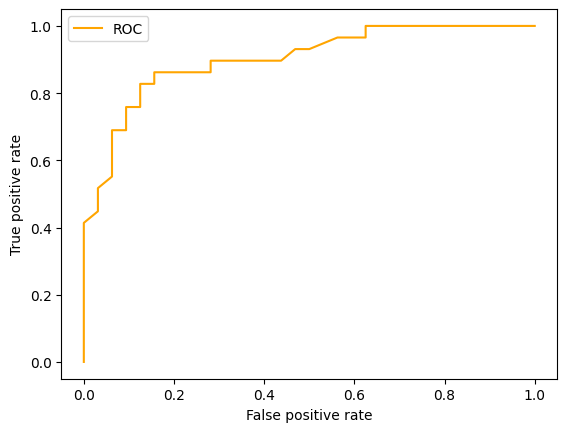

In [56]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, color="Orange", label="ROC")
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.legend()
  plt.show()
plot_roc_curve(fpr, tpr)

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probp)

np.float64(0.9014008620689654)

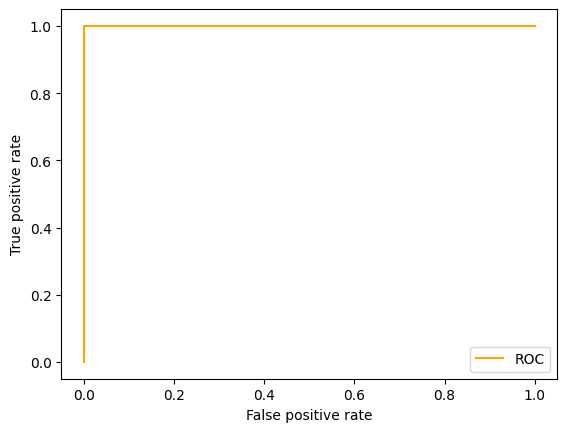

In [58]:
fpr, tpr, thresholds=roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [59]:
roc_auc_score(y_test, y_test)

np.float64(1.0)

# **Confusion Matrix**
A quick way to compare the labels a model predicts and actual labels model suppose to predict

In [60]:
from sklearn.metrics import confusion_matrix
ypreds=clf1.predict(x_test)
confusion_matrix(y_test, ypreds)

array([[21, 11],
       [ 2, 27]])

In [61]:
pd.crosstab(y_test, ypreds, rownames=["Actual label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual label,,
0,21,11
1,2,27


In [62]:
len(x_test)

61

In [63]:
24+8+3+26

61

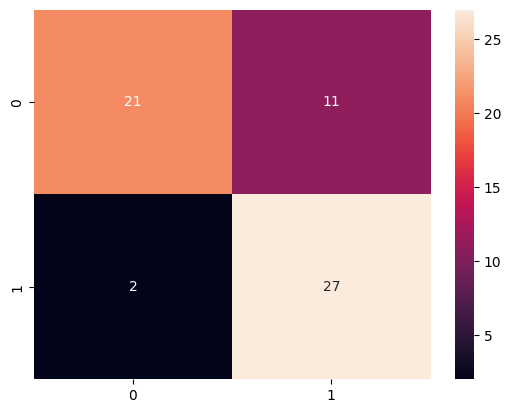

In [64]:
conf=confusion_matrix(y_test, ypreds)

sns.heatmap(conf, annot=True);

# **Classification Report**

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypreds))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76        32
           1       0.71      0.93      0.81        29

    accuracy                           0.79        61
   macro avg       0.81      0.79      0.78        61
weighted avg       0.82      0.79      0.78        61



Precision --> Indicates a proportion of positive identification(When model predicts class 1) which were correct. A model predicts with zero false identification precision is 1.0

recall --> indicates proportion of poaitives which were classified. A model with 0 flase negatives has recall of 1.0

f1 score --> combination of precision and recall. A perfect model has f1 score of 1.0

support --> number of samples on which the metrics are calculated on

Accuracy --> accuracy of model. a perfect model has accuracy of 1.0

macro avg --> the average precision, recall, f1 score between classes. it doesnt class imbalnce into effort if data have class imbalance, pay attention to metrics

weighted avg --> the weighted average precision, recall, f1 score between classes. weighted means each metrics is calculated wrt on how many samples are in class. Metric will favour on majority class(gives high value when one class outperforms another class in terms of numbers)

In [66]:
d_true=np.zeros(1000)
d_true[0]=1
d_pred=np.zeros(1000)
pd.DataFrame(classification_report(d_true, d_pred, output_dict=True))


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


only 1 sample of diff class in 1000 samples

class imbalances --> when one class has much more data than other

# **Regression Model Evaluation**


*   R^2 method
*   Mean absolute error
*   Mean Squared error



In [67]:
from sklearn.ensemble import RandomForestRegressor
x5=boston.drop('medv', axis=1)
y5=boston['medv']
x_train, x_test, y_train, y_test=train_test_split(x5, y5, test_size=0.2)
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
y_predict=rf.predict(x_test)


R^2 / Cofficient of determination --> Compares your model predictions with mean of the target.If your model prediicts only mean of the target then R^2 will be 0 and if your model perfectly predicts range of numbers for target then its R^2 will be 1

In [68]:
rf.score(x_test, y_test)

0.900891275900007

In [69]:
from sklearn.metrics import r2_score
y_mean=np.full(len(y_test), y_test.mean())
r2_score(y_test, y_mean)

0.0

In [70]:
r2_score(y_test, y_test)

1.0

In [71]:
r2_score(y_test, y_predict)

0.900891275900007

# **Mean Absolute error**
mean absolute differences between predicted values and the actual target values

mean of Predicted values - target variables

Value it gives is the how much diff is there in the prediction from actual target variables

In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

2.021392156862745

In [73]:
df=pd.DataFrame({"Predicted value": y_predict, "Actual Values":y_test})
df
df["Diff"]=df["Predicted value"] - df["Actual Values"]
df

,Predicted value,Actual Values,Diff
406,12.698,11.9,0.798
348,27.648,24.5,3.148
267,43.055,50.0,-6.945
104,20.344,20.1,0.244
284,31.061,32.2,-1.139
...,...,...,...
173,23.253,23.6,-0.347
426,14.703,10.2,4.503
423,12.915,13.4,-0.485
415,8.739,7.2,1.539


In [74]:
mae=df['Diff'].abs()
mae.mean()

np.float64(2.021392156862745)

# **Mean Squared Error**

MSE will be higher than MAE because it squares the error before taking mean

MSE sqaures all the diff/ error and calculates mean of all the differences

In [75]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_predict)
mse

8.460704490196072

In [76]:
np.square(df['Diff']).mean()

np.float64(8.460704490196072)

For Regression models we need to minimize MAE ans MSE and maximize R^2 score

# **Cross Validation and Scoring parameter**

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(3)
x6=hd.drop("target", axis=1)
y6=hd['target']
classi=RandomForestClassifier()
x_train, x_test, y_train, y_test=train_test_split(x6, y6, test_size=0.2)
classi.fit(x_train, y_train)
cvs=cross_val_score(classi, x6, y6, cv=5, scoring=None)
cvs

array([0.81967213, 0.90163934, 0.80327869, 0.85      , 0.78333333])

In [78]:
cvs.mean()*100

np.float64(83.1584699453552)

For accuracy

In [79]:
np.random.seed(3)
np.mean(cross_val_score(classi, x6, y6, cv=5, scoring="accuracy"))

np.float64(0.8182513661202186)

For Precision

In [80]:
np.mean(cross_val_score(classi, x6, y6, cv=5, scoring="precision"))

np.float64(0.838775972188536)

For Recall

In [81]:
np.mean(cross_val_score(classi, x6, y6, cv=5, scoring="recall"))

np.float64(0.8848484848484848)

For f1 score

In [82]:
np.mean(cross_val_score(classi, x6, y6, cv=5, scoring="f1"))

np.float64(0.8498699191584445)

Now lets check for Regression model

In [83]:
from sklearn.ensemble import RandomForestRegressor
reg1=RandomForestRegressor()
cross_val_score(reg, x5, y5, cv=5, scoring=None)

array([0.7682869 , 0.86203269, 0.77340715, 0.45411379, 0.27960341])

In [84]:
np.mean(cross_val_score(reg1, x6, y6, cv=5, scoring="r2"))

np.float64(0.05943046511627912)

In [85]:
np.mean(cross_val_score(reg1, x6, y6, cv=5, scoring="neg_mean_absolute_error"))

np.float64(-0.3349049180327869)

In [86]:
np.mean(cross_val_score(reg1, x6, y6, cv=5, scoring="neg_mean_squared_error"))

np.float64(-0.19024849180327869)

# **Improving the model**

From data POV

* we can collect more data (the more the data, the better)
* we can improve the data quality (by giving more depth in samples like in carprice model, we can give more features about car)

From Model POV
* By using better model
* By improving the current model with hyperparameters

Parameters--> Model find pattern in data

HyperParamters--> settings of model to improve ability of model to find patterns in data(Try and error method)

# **Tuning Hyperparameters**

In [87]:
from sklearn.ensemble import RandomForestClassifier
clff=RandomForestClassifier()

In [88]:
clff.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_score(y_test, y_preds):
  acc= accuracy_score(y_test, y_preds)
  prec= precision_score(y_test, y_preds)
  recall= recall_score(y_test, y_preds)
  f1= f1_score(y_test, y_preds)

  metric_dict={"Accuracy": round(acc,2), "Precision: ": round(prec,2), "recall": round(recall, 2), "F1": round(f1,2)}

  print(f"Accuracy: {acc *100:.2f}% ")
  print(f"Precision: {prec:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1: {f1:.2f}")
  return metric_dict


In [90]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(51)
hds=hd.sample(frac=1)
x=hds.drop('target', axis=1)
y=hds['target']
len(hds)

303

In [91]:
ts=round(0.7 * len(hds))
vs=round(ts + 0.15 * len(hds))
x_train, y_train= x[:ts], y[:ts]
x_valid, y_valid= x[ts:vs], y[ts:vs]
x_test, y_test= x[vs:], y[vs:]

len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [92]:
# Making baseline Model
clfb=RandomForestClassifier()
clfb.fit(x_train, y_train)

y_predv=clfb.predict(x_valid)
base=evaluate_score(y_valid, y_predv)

Accuracy: 82.22% 
Precision: 0.79
Recall: 0.86
F1: 0.83


Now tuning hyperparameters for 2nd model

In [93]:
clf_2=RandomForestClassifier(n_estimators=80)
clf_2.fit(x_train, y_train)
ypred2=clf_2.predict(x_valid)
base2=evaluate_score(y_valid, ypred2)

Accuracy: 80.00% 
Precision: 0.78
Recall: 0.82
F1: 0.80


Now using maxdepth

In [94]:
clf_3=RandomForestClassifier(n_estimators=80, max_depth=10)
clf_3.fit(x_train, y_train)
ypred3=clf_3.predict(x_valid)
base3=evaluate_score(y_valid, ypred3)

Accuracy: 86.67% 
Precision: 0.86
Recall: 0.86
F1: 0.86


# **Randomized Search CV**

In [109]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators": [10, 100, 200, 500, 1000, 1200],
      "max_depth": [None, 5, 10, 20, 30],
      "max_features": ["auto", "sqrt"],
      "min_samples_split": [2,4,6],
      "min_samples_leaf": [1,2,4]}

np.random.seed(42)
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

clfr=RandomForestClassifier(n_jobs=1)

rs_clf=RandomizedSearchCV(estimator=clfr,
                          param_distributions=grid,
                          n_iter=10, cv=5, verbose=2)

rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

after executing RSCV, after finding all the combinations, the best paramter will automatically be assigned to rs_clf

In [96]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [97]:
yrpreds=rs_clf.predict(x_test)

rs=evaluate_score(y_test, yrpreds)

Accuracy: 85.25% 
Precision: 0.81
Recall: 0.89
F1: 0.85


In [111]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
grid2={"n_estimators": [10, 100, 200, 500, 1000, 1200],
      "max_depth": [None, 5, 10, 20, 30],
      "max_features": ["auto", "sqrt"],
      "min_samples_split": [2,4,6],
      "min_samples_leaf": [1,2,4]}

gs=GridSearchCV(estimator=clfr,param_grid=grid2, cv=2, verbose=2)

gs.fit(x_train, y_train)

Fitting 2 folds for each of 540 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

KeyboardInterrupt: 